In [1]:
import os
from multiprocessing import Pool, cpu_count, Process

from ioh import get_problem
from ioh import logger

import numpy as np
import pandas as pd
from scipy.stats import ks_2samp

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
func = om
population = np.random.randint(0, 2, size=(POPULATION_SIZE, func.meta_data.n_variables), dtype=np.int8)
func_vals = np.array([func(i) for i in population])

index = func_vals.argmax()
x_opt = population[index]
f_opt = func_vals[index]

In [50]:
df_ol.iloc[0].to_dict()

{'population_size': 21.209508879201906,
 'mutation_probability': 0.7278953843983146,
 'crossover_probability': 0.5298316906283708,
 'crossover_n': 1,
 'mutation_type': 'swap',
 'index': 18,
 'f_opt': 50.0}

In [4]:
df_ol = pd.read_csv('../v2/results_lo.csv')
df_ol.head(10)

,population_size,mutation_probability,crossover_probability,crossover_n,mutation_type,index,f_opt
0,21.209509,0.727895,0.529832,1,swap,18,50.0
1,429.193426,0.529832,0.385662,1,swap,30,50.0
2,355.648031,0.529832,0.385662,1,swap,31,50.0
3,95.409548,0.148735,0.385662,1,swap,31,50.0
4,517.947468,1.000000,0.204336,1,swap,32,50.0
5,390.693994,0.204336,0.529832,1,swap,38,50.0
6,12.067926,0.148735,1.000000,1,swap,38,50.0
7,23.299518,0.529832,0.204336,1,swap,42,50.0
8,65.512856,0.078805,0.529832,1,swap,44,50.0
9,244.205309,0.148735,0.108264,1,swap,50,50.0


In [5]:
df_om = pd.read_csv('../v2/results_om.csv')
df_om.head(10)

,population_size,mutation_probability,crossover_probability,crossover_n,mutation_type,index,f_opt
0,30.888436,0.727895,1.000000,1,swap,15,50.0
1,138.949549,1.000000,1.000000,1,swap,18,50.0
2,104.811313,0.204336,0.727895,1,swap,19,50.0
3,25.595479,0.280722,1.000000,1,swap,20,50.0
4,355.648031,0.280722,0.529832,1,swap,21,50.0
5,202.358965,0.280722,0.280722,1,swap,24,50.0
6,138.949549,0.041753,0.280722,1,swap,24,50.0
7,59.636233,0.041753,0.529832,1,swap,24,50.0
8,115.139540,0.280722,0.727895,1,swap,25,50.0
9,222.299648,0.008532,0.727895,1,swap,26,50.0


In [9]:
df_labs = pd.read_csv('../v2/results_labs.csv')
df_labs.sort_values(by=['f_opt'], ascending=False).head(10)
# df_labs.head(10)

,population_size,mutation_probability,crossover_probability,crossover_n,mutation_type,index,f_opt
101,268.269580,0.001269,0.000137,1,flip,299,6.095238
32,294.705170,0.030392,0.000356,1,flip,299,5.818182
203,471.486636,0.280722,0.057362,1,flip,299,5.565217
185,30.888436,0.022122,0.108264,1,flip,299,5.565217
222,86.851137,0.108264,0.148735,1,swap,299,5.120000
122,86.851137,0.030392,0.078805,1,flip,299,5.120000
229,19.306977,0.006210,0.529832,1,flip,299,5.120000
40,429.193426,0.385662,0.000356,1,flip,299,5.120000
17,828.642773,0.030392,0.078805,1,flip,299,5.120000
12,28.117687,0.000356,0.000356,1,flip,299,5.120000


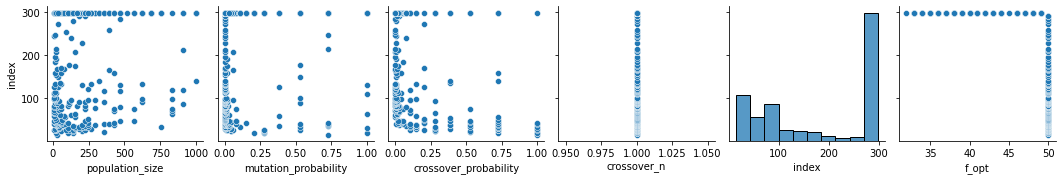

In [14]:
sns.pairplot(df_om, y_vars=['index'])

/tmp/ipykernel_8039/3279801464.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_om.hist(bins=20,ax=ax);


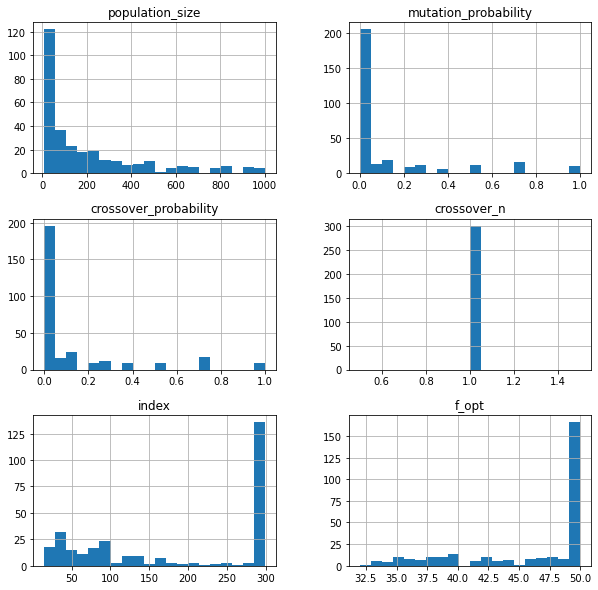

In [32]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df_om.hist(bins=20,ax=ax);

# OM

## Hyperparameter optimization

In [54]:
om = pd.read_csv('../v2/results_om_1k.csv')
om.sort_values(by=['index']).head(20)

,population_size,mutation_probability,crossover_probability,crossover_n,mutation_type,index,f_opt
0,28.117687,0.011721,0.108264,20,swap,15,50.0
1,294.705170,0.727895,0.529832,17,swap,15,50.0
2,59.636233,0.030392,0.385662,9,swap,15,50.0
3,49.417134,0.280722,1.000000,16,swap,16,50.0
4,71.968567,1.000000,0.385662,4,swap,17,50.0
5,294.705170,0.003290,0.529832,20,swap,17,50.0
6,40.949151,0.000489,0.529832,19,flip,17,50.0
7,12.067926,1.000000,0.727895,2,swap,17,50.0
14,23.299518,1.000000,0.385662,15,swap,18,50.0
13,17.575106,0.001743,0.148735,17,swap,18,50.0


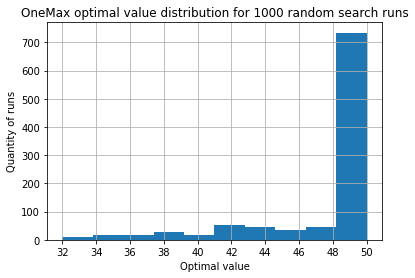

In [213]:
om['f_opt'].hist()
plt.title('OneMax optimal value distribution for 1000 random search runs')
plt.xlabel('Optimal value')
plt.ylabel('Quantity of runs')
plt.xticks(range(32, 51, 2))
plt.savefig('../v2/images/om_func_dist.png');

In [56]:
ks_2samp(om.sort_values(by=['index']).head(100).index.values, om.sort_values(by=['index']).index.values)

KstestResult(statistic=0.9, pvalue=2.0463309893554039e-91)

In [35]:
om.sort_values(by=['index']).head(30)

,population_size,mutation_probability,crossover_probability,crossover_n,mutation_type,index,f_opt
0,28.117687,0.011721,0.108264,20,swap,15,50.0
1,294.705170,0.727895,0.529832,17,swap,15,50.0
2,59.636233,0.030392,0.385662,9,swap,15,50.0
3,49.417134,0.280722,1.000000,16,swap,16,50.0
4,71.968567,1.000000,0.385662,4,swap,17,50.0
5,294.705170,0.003290,0.529832,20,swap,17,50.0
6,40.949151,0.000489,0.529832,19,flip,17,50.0
7,12.067926,1.000000,0.727895,2,swap,17,50.0
14,23.299518,1.000000,0.385662,15,swap,18,50.0
13,17.575106,0.001743,0.148735,17,swap,18,50.0


## Rerun results

In [74]:
om50 = om.head(50).copy()

In [57]:
om_re = pd.read_csv('../v2/rerun_om_50_15.csv')
om_re.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,21,23,24,20,25,24,26,19,21,23,23,21,26,21,18
1,17,19,19,13,20,16,20,17,14,18,21,18,17,20,19
2,20,22,19,20,19,23,20,20,20,23,19,15,18,21,22
3,16,20,21,17,19,20,17,17,15,17,14,20,19,19,18
4,19,21,18,20,20,22,20,16,20,21,20,19,21,21,18


In [138]:
om_re.shape

(50, 15)

In [162]:
d = pd.DataFrame(om_re.T.values * om50.population_size.values)
d[d < 1000]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,588,NaN,NaN,784.0,NaN,NaN,820,228,323,NaN,...,228,462,NaN,220,276,NaN,494,400,NaN,240
1,644,NaN,NaN,980.0,NaN,NaN,861,216,323,NaN,...,240,441,NaN,264,228,NaN,494,336,NaN,200
2,672,NaN,NaN,NaN,NaN,NaN,861,240,323,NaN,...,192,441,NaN,231,288,NaN,598,432,NaN,220
3,560,NaN,NaN,833.0,NaN,NaN,861,204,380,NaN,...,216,399,NaN,253,264,NaN,572,320,NaN,220
4,700,NaN,NaN,931.0,NaN,NaN,902,216,342,NaN,...,276,462,NaN,187,252,918.0,494,304,NaN,190
5,672,NaN,NaN,980.0,NaN,NaN,943,252,418,NaN,...,180,588,NaN,242,216,NaN,598,352,NaN,190
6,728,NaN,NaN,833.0,NaN,NaN,861,228,304,NaN,...,216,546,NaN,231,276,NaN,546,400,NaN,190
7,532,NaN,NaN,833.0,NaN,NaN,902,240,304,NaN,...,204,357,NaN,297,264,NaN,546,320,NaN,240
8,588,NaN,NaN,735.0,NaN,NaN,738,252,342,NaN,...,216,420,NaN,242,252,NaN,520,304,NaN,190
9,644,NaN,NaN,833.0,NaN,NaN,861,228,361,NaN,...,240,525,NaN,264,276,NaN,442,368,NaN,220


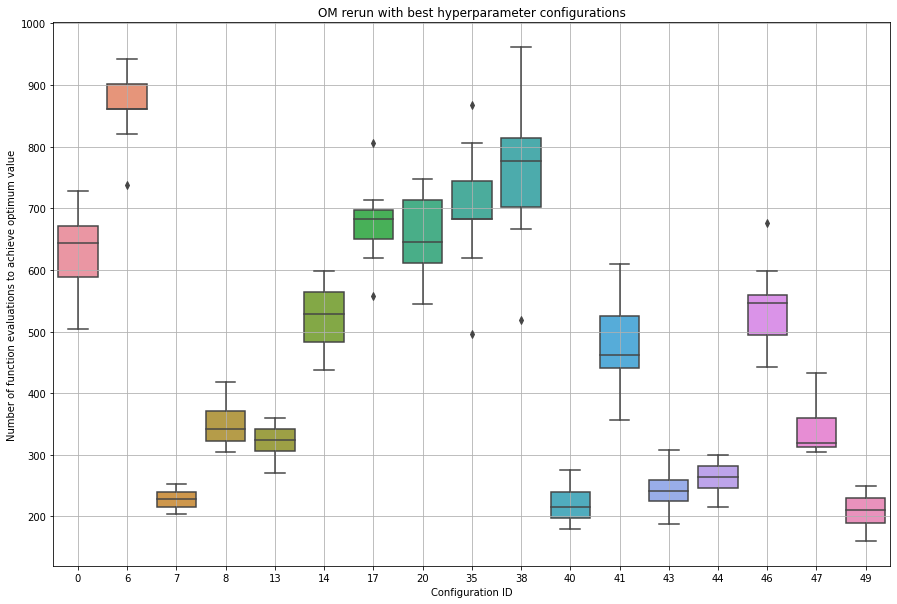

In [172]:
plt.figure(figsize=(15,10))
plt.title('OM rerun with best hyperparameter configurations')
plt.xlabel('Configuration ID')
plt.ylabel('Number of function evaluations to achieve optimum value')
sns.boxplot(data=d[d < 1000].T.dropna().T)
plt.grid()
plt.savefig('../v2/images/om_rerun_box.png');

In [132]:
print(om50[['population_size', 'mutation_probability', 'crossover_probability',
       'crossover_n', 'mutation_type', 'rerun_mean', 'evaluations_cnt']].sort_values(by=['evaluations_cnt']).head(30).to_latex(index=False))

\begin{tabular}{rrrrlrr}
\toprule
 population\_size &  mutation\_probability &  crossover\_probability &  crossover\_n & mutation\_type &  rerun\_mean &  evaluations\_cnt \\
\midrule
              10 &              0.011721 &               0.148735 &           19 &          swap &       21.07 &              211 \\
              12 &              0.385662 &               0.030392 &           17 &          swap &       18.60 &              223 \\
              12 &              1.000000 &               0.727895 &            2 &          swap &       19.07 &              229 \\
              11 &              0.000489 &               0.280722 &           20 &         smart &       22.07 &              243 \\
              12 &              0.006210 &               0.529832 &            7 &          swap &       21.93 &              263 \\
              18 &              0.001743 &               0.148735 &           17 &          swap &       18.00 &              324 \\
              16 & 

In [120]:
om50.columns

Index(['population_size', 'mutation_probability', 'crossover_probability',
       'crossover_n', 'mutation_type', 'index', 'f_opt', 'rerun_mean',
       'evaluations_cnt'],
      dtype='object')

In [130]:
om50['population_size'] = np.round(om50['population_size']).astype(int)
om50['rerun_mean'] = np.round(np.mean(om_re.values, axis=1), 2)
om50['evaluations_cnt'] = np.round(om50['rerun_mean'] * om50['population_size']).astype(int)
om50.sort_values(by=['evaluations_cnt'])

,population_size,mutation_probability,crossover_probability,crossover_n,mutation_type,index,f_opt,rerun_mean,evaluations_cnt
49,10,0.011721,0.148735,19,swap,22,50.0,21.07,211
40,12,0.385662,0.030392,17,swap,21,50.0,18.60,223
7,12,1.000000,0.727895,2,swap,17,50.0,19.07,229
43,11,0.000489,0.280722,20,smart,22,50.0,22.07,243
44,12,0.006210,0.529832,7,swap,22,50.0,21.93,263
13,18,0.001743,0.148735,17,swap,18,50.0,18.00,324
47,16,0.727895,0.057362,6,swap,22,50.0,21.33,341
8,19,0.385662,1.000000,12,swap,18,50.0,18.33,348
41,21,0.004520,0.204336,20,swap,22,50.0,22.93,482
14,23,1.000000,0.385662,15,swap,18,50.0,22.67,521


In [273]:
om50.sort_values(by=['evaluations_cnt']).iloc[0].to_dict()

{'population_size': 10,
 'mutation_probability': 0.0117210229753348,
 'crossover_probability': 0.1487352107293511,
 'crossover_n': 19,
 'mutation_type': 'swap',
 'index': 22,
 'f_opt': 50.0,
 'rerun_mean': 21.07,
 'evaluations_cnt': 211}

## LO

In [214]:
lo = pd.read_csv('../v2/results_lo_1k.csv')
lo['population_size'] = np.round(lo['population_size']).astype(int)
lo['evaluations_cnt'] = np.round(lo['index'] * lo['population_size']).astype(int)
lo[lo.f_opt == 50].sort_values(by=['evaluations_cnt']).head(30)

,population_size,mutation_probability,crossover_probability,crossover_n,mutation_type,index,f_opt,evaluations_cnt
10,13,0.529832,0.727895,3,swap,27,50.0,351
8,18,0.385662,0.108264,18,swap,26,50.0,468
35,18,0.057362,0.108264,6,swap,52,50.0,936
0,60,1.000000,0.108264,13,swap,16,50.0,960
3,41,0.280722,0.148735,16,swap,24,50.0,984
15,37,0.108264,0.529832,11,swap,30,50.0,1110
66,12,0.030392,0.529832,1,swap,99,50.0,1188
67,12,0.529832,0.002395,7,swap,104,50.0,1248
60,16,0.148735,0.016103,4,swap,88,50.0,1408
28,37,1.000000,0.008532,15,swap,41,50.0,1517


In [215]:
lo[lo.f_opt==50].shape[0],lo.shape[0]

(347, 1000)

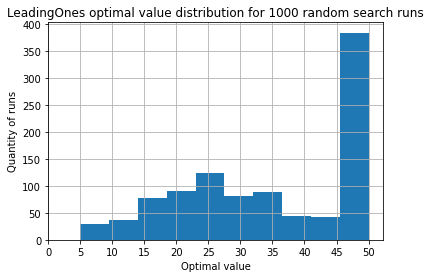

In [258]:
lo['f_opt'].hist()
plt.title('LeadingOnes optimal value distribution for 1000 random search runs')
plt.xlabel('Optimal value')
plt.ylabel('Quantity of runs')
plt.xticks(range(0, 51, 5))
plt.savefig('../v2/images/lo_func_dist.png');

In [217]:
lo_re = pd.read_csv('../v2/rerun_lo_50_15.csv')
lo_re.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,20,19,19,19,19,18,22,19,20,18,21,18,21,14,18
1,17,20,19,18,17,21,21,17,22,22,17,19,22,19,21
2,26,21,24,29,19,26,24,25,24,25,29,23,23,27,27
3,18,24,18,20,20,15,21,19,23,20,21,18,20,21,17
4,18,20,23,18,18,19,21,20,21,20,20,22,17,20,15


In [218]:
lo_re.shape, lo.sort_values(by=['f_opt', 'evaluations_cnt'], ascending=[False, True]).head(50).population_size.values.shape

((50, 15), (50,))

In [219]:
d = pd.DataFrame(lo_re.T.values * lo.sort_values(by=['f_opt', 'evaluations_cnt'], ascending=[False, True]).head(50).population_size.values)
d[d < 1000].T.dropna().T

,0,1,2,4,5,6,7,8,10,12,21,22,23,24,27,29,30,31,32,37
0,260.0,306.0,468.0,738.0,666.0,336.0,564.0,560.0,528.0,444.0,567.0,665.0,576.0,532.0,703.0,741.0,605.0,819.0,522.0,598.0
1,247.0,360.0,378.0,820.0,777.0,300.0,504.0,624.0,592.0,480.0,588.0,741.0,432.0,616.0,969.0,608.0,649.0,735.0,540.0,702.0
2,247.0,342.0,432.0,943.0,777.0,300.0,840.0,608.0,576.0,396.0,504.0,912.0,384.0,588.0,988.0,627.0,649.0,840.0,594.0,624.0
3,247.0,324.0,522.0,738.0,814.0,264.0,648.0,512.0,448.0,564.0,483.0,703.0,456.0,700.0,684.0,836.0,462.0,714.0,504.0,676.0
4,247.0,306.0,342.0,738.0,740.0,324.0,540.0,576.0,480.0,696.0,651.0,893.0,480.0,644.0,741.0,722.0,484.0,693.0,684.0,598.0
5,234.0,378.0,468.0,779.0,666.0,372.0,708.0,624.0,464.0,468.0,651.0,836.0,468.0,532.0,950.0,741.0,561.0,714.0,504.0,858.0
6,286.0,378.0,432.0,861.0,666.0,288.0,516.0,608.0,384.0,636.0,525.0,969.0,516.0,504.0,931.0,646.0,583.0,693.0,594.0,702.0
7,247.0,306.0,450.0,820.0,777.0,324.0,576.0,528.0,448.0,336.0,546.0,646.0,420.0,532.0,836.0,722.0,649.0,609.0,468.0,676.0
8,260.0,396.0,432.0,861.0,629.0,360.0,636.0,624.0,592.0,564.0,546.0,741.0,360.0,588.0,703.0,722.0,506.0,567.0,522.0,806.0
9,234.0,396.0,450.0,820.0,629.0,288.0,756.0,464.0,480.0,564.0,567.0,912.0,492.0,672.0,798.0,760.0,594.0,840.0,612.0,572.0


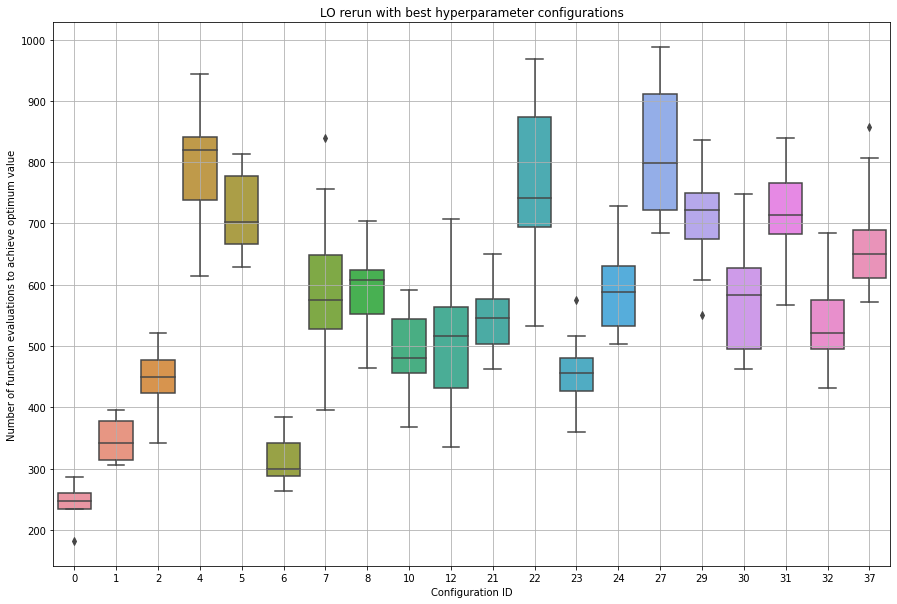

In [220]:
plt.figure(figsize=(15,10))
plt.title('LO rerun with best hyperparameter configurations')
plt.xlabel('Configuration ID')
plt.ylabel('Number of function evaluations to achieve optimum value')
sns.boxplot(data=d[d < 1000].T.dropna().T)
plt.grid()
plt.savefig('../v2/images/lo_rerun_box.png');

In [223]:
print(lo50.sort_values(by=['evaluations_cnt'])[['population_size', 'mutation_probability', 'crossover_probability',
       'crossover_n', 'mutation_type', 'evaluations_cnt']].sort_values(by=['evaluations_cnt']).head(30).to_latex(column_format='llllll',index=False))

\begin{tabular}{llllll}
\toprule
 population\_size &  mutation\_probability &  crossover\_probability &  crossover\_n & mutation\_type &  evaluations\_cnt \\
\midrule
              13 &              0.529832 &               0.727895 &            3 &          swap &              247 \\
              12 &              0.030392 &               0.529832 &            1 &          swap &              317 \\
              18 &              0.385662 &               0.108264 &           18 &          swap &              350 \\
              18 &              0.057362 &               0.108264 &            6 &          swap &              446 \\
              12 &              0.016103 &               0.204336 &            1 &          swap &              456 \\
              16 &              0.022122 &               0.385662 &            1 &          swap &              492 \\
              12 &              0.385662 &               0.002395 &            8 &          swap &              515 \\


In [222]:
lo50 = lo[lo.f_opt == 50].sort_values(by=['evaluations_cnt']).head(50)

lo50['population_size'] = np.round(lo50['population_size']).astype(int)
lo50['rerun_mean'] = np.round(np.mean(lo_re.values, axis=1), 2)
lo50['evaluations_cnt'] = np.round(lo50['rerun_mean'] * lo50['population_size']).astype(int)
lo50.sort_values(by=['evaluations_cnt'])

,population_size,mutation_probability,crossover_probability,crossover_n,mutation_type,index,f_opt,evaluations_cnt,rerun_mean
10,13,0.529832,0.727895,3,swap,27,50.0,247,19.00
66,12,0.030392,0.529832,1,swap,99,50.0,317,26.40
8,18,0.385662,0.108264,18,swap,26,50.0,350,19.47
35,18,0.057362,0.108264,6,swap,52,50.0,446,24.80
194,12,0.016103,0.204336,1,swap,207,50.0,456,38.00
65,16,0.022122,0.385662,1,swap,95,50.0,492,30.73
97,12,0.385662,0.002395,8,swap,133,50.0,515,42.93
191,18,0.016103,0.280722,1,swap,200,50.0,536,29.80
61,21,0.011721,0.057362,19,swap,88,50.0,547,26.07
277,11,0.022122,0.006210,9,swap,306,50.0,572,52.00


In [274]:
lo50.sort_values(by=['evaluations_cnt']).iloc[0].to_dict()

{'population_size': 13,
 'mutation_probability': 0.5298316906283708,
 'crossover_probability': 0.7278953843983146,
 'crossover_n': 3,
 'mutation_type': 'swap',
 'index': 27,
 'f_opt': 50.0,
 'evaluations_cnt': 247,
 'rerun_mean': 19.0}

# LABS

In [2]:
labs = pd.read_csv('../v2/results_labs_500.csv')
labs.sort_values(by=['f_opt'], ascending=False).head(20)      

,population_size,mutation_probability,crossover_probability,crossover_n,mutation_type,index,f_opt
346,40.949151,0.057362,0.000489,1,smart,1249,7.529412
498,10.000000,0.030392,0.204336,1,flip,5119,6.095238
363,33.932218,0.006210,0.148735,8,flip,1507,6.095238
190,152.641797,0.280722,0.004520,1,swap,334,6.095238
464,14.563485,0.108264,0.016103,18,flip,3514,6.095238
275,65.512856,0.016103,0.011721,1,swap,780,5.818182
319,49.417134,0.078805,0.001743,1,flip,1035,5.818182
299,59.636233,0.041753,0.078805,1,flip,857,5.818182
397,25.595479,0.280722,0.148735,1,flip,1999,5.818182
349,37.275937,0.016103,0.000672,13,flip,1372,5.818182


In [3]:
labs = pd.read_csv('../v2/results_labs_500.csv')
labs['population_size'] = np.round(labs['population_size']).astype(int)
labs['evaluations_cnt'] = np.round(labs['index'] * labs['population_size']).astype(int)
labs.sort_values(by=['f_opt']).iloc[16]

population_size               829
mutation_probability     0.022122
crossover_probability      0.0001
crossover_n                    12
mutation_type               smart
index                          60
f_opt                    2.782609
evaluations_cnt             49740
Name: 26, dtype: object

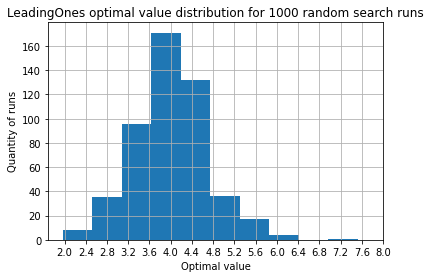

In [259]:
labs['f_opt'].hist()
plt.title('LeadingOnes optimal value distribution for 1000 random search runs')
plt.xlabel('Optimal value')
plt.ylabel('Quantity of runs')
plt.xticks(np.linspace(2,8,16))
plt.savefig('../v2/images/labs_func_dist.png');

In [261]:
labs.loc[[450, 498, 348, 380]]

,population_size,mutation_probability,crossover_probability,crossover_n,mutation_type,index,f_opt,evaluations_cnt
450,15,0.041753,0.008532,1,flip,3514,5.565217,52710
498,10,0.030392,0.204336,1,flip,5119,6.095238,51190
348,41,0.030392,0.108264,4,flip,1249,5.565217,51209
380,28,0.030392,0.000100,7,flip,1819,5.565217,50932


In [5]:
labs_res = pd.read_csv('../v2/rerun_labs_20_15.csv')

In [6]:
np.linspace(3,8,11)

array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ])

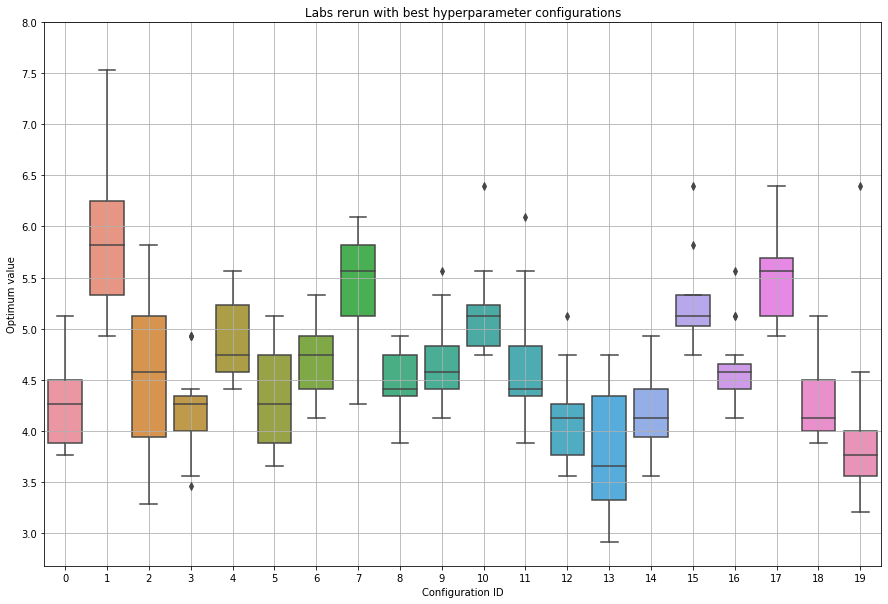

In [7]:
plt.figure(figsize=(15,10))
plt.title('Labs rerun with best hyperparameter configurations')
plt.xlabel('Configuration ID')
plt.ylabel('Optimum value')
sns.boxplot(data=labs_res.T)
plt.grid()
plt.yticks(np.linspace(3,8,11))
plt.savefig('../v2/images/labs_rerun_box.png');

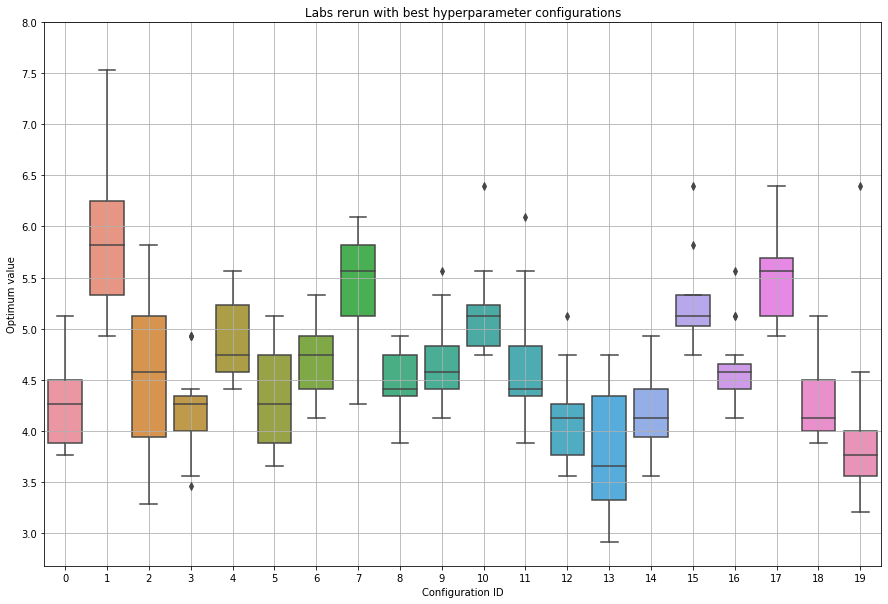

In [271]:
plt.figure(figsize=(15,10))
plt.title('Labs rerun with best hyperparameter configurations')
plt.xlabel('Configuration ID')
plt.ylabel('Optimum value')
sns.boxplot(data=labs_res.T)
plt.grid()
plt.yticks(np.linspace(3,8,11))
plt.savefig('../v2/images/labs_rerun_box.png');

In [ ]:
\begin{tabular}{llllll}
\toprule
 population\_size &  mutation\_probability &  crossover\_probability &  crossover\_n & mutation\_type &    f\_opt \\
\midrule
       10.000000 &              0.030392 &               0.204336 &            1 &          flip & 6.250183 \\
       59.636233 &              0.041753 &               0.078805 &            1 &          flip & 5.945607 \\
       14.563485 &              0.041753 &               0.008532 &            1 &          flip & 5.652369 \\
       40.949151 &              0.030392 &               0.108264 &            4 &          flip & 5.580588 \\
       28.117687 &              0.030392 &               0.000100 &            7 &          flip & 5.695234 \\
\bottomrule
\end{tabular}

# Final

In [ ]:
om50[['population_size', 'mutation_probability', 'crossover_probability',
       'crossover_n', 'mutation_type', 'rerun_mean', 'evaluations_cnt']].sort_values(by=['evaluations_cnt']).head(1)

+ 